In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('D:/Data Science/Symbiosis/Dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
x=df.drop(columns=["Outcome"])
y=df["Outcome"]

In [6]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
DT=DecisionTreeClassifier()
lr=LogisticRegression()
knn=KNeighborsClassifier()
svm=SVC()
GNB=GaussianNB()
BaggingClassifier=BaggingClassifier()
RandomForest=RandomForestClassifier()
AdaBoostClassifier=AdaBoostClassifier()
GradientBoostingClassifier=GradientBoostingClassifier()

models={"Logistic":lr,"KNN":knn,"SVM":svm,"GaussianNB":GNB,"DecisionTreeClassifier":DT,"BaggingClassifier":BaggingClassifier,
       "RandomForest":RandomForest,"AdaBoostClassifier":AdaBoostClassifier,
        "GradientBoostingClassifier":GradientBoostingClassifier}


In [27]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy=[]
for name,model in models.items():
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    acc=accuracy_score(ytest,ypred)
    accuracy.append(acc)
    print("For ",name," ,Accuracy is :",acc)

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


For  Logistic  ,Accuracy is : 0.8246753246753247
For  KNN  ,Accuracy is : 0.7532467532467533
For  SVM  ,Accuracy is : 0.7922077922077922
For  GaussianNB  ,Accuracy is : 0.7922077922077922
For  DecisionTreeClassifier  ,Accuracy is : 0.8051948051948052
For  BaggingClassifier  ,Accuracy is : 0.7662337662337663
For  RandomForest  ,Accuracy is : 0.8051948051948052
For  AdaBoostClassifier  ,Accuracy is : 0.7792207792207793
For  GradientBoostingClassifier  ,Accuracy is : 0.8181818181818182


Text(0, 0.5, 'Accuracy')

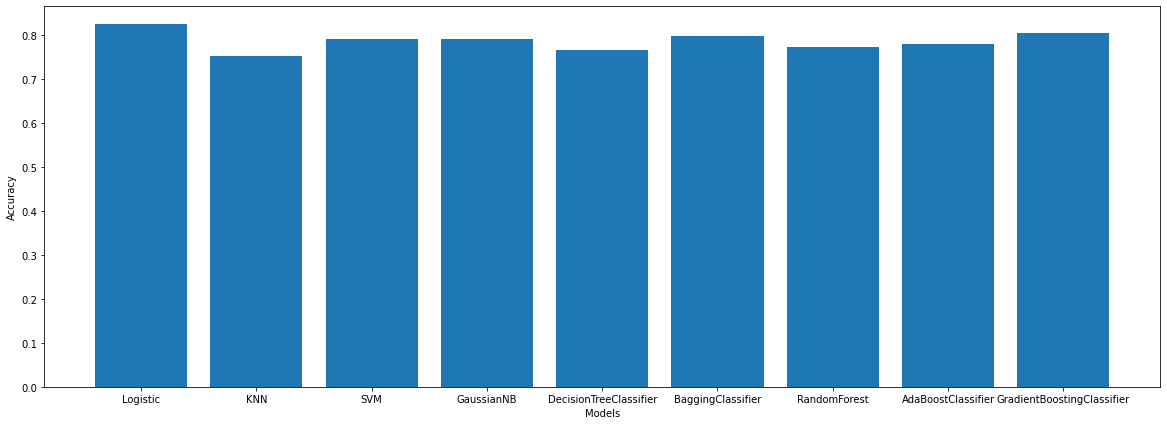

In [25]:
fig=plt.figure(figsize=(20,7))
plt.bar(models.keys(),accuracy)
plt.xlabel("Models")
plt.ylabel("Accuracy")